In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
plt.style.use('seaborn-darkgrid')
%matplotlib inline

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.power(X1, 2)

# Simulate outcome variable
Y = alpha + beta[0]*X1 + np.random.randn(size)*sigma

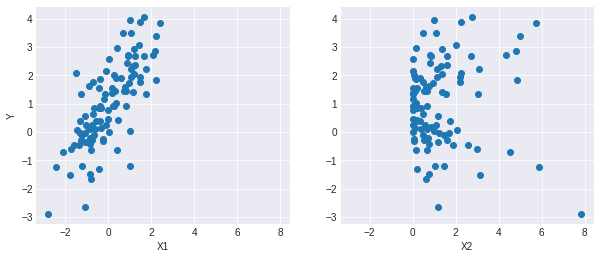

In [2]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [277]:
basic_model = pm.Model()

with basic_model:

    xi    = pm.Bernoulli('xi', 0.5, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta  = pm.Normal('beta',  mu=0, sd=10, shape=2)
    mu    = alpha + xi[0]*beta[0]*X1 + xi[1]*beta[1]*X2
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [278]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(5000, tune=2000, target_accept=0.99)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [xi]
>NUTS: [beta, alpha, sigma]
Sampling 4 chains: 100%|██████████| 28000/28000 [00:08<00:00, 3218.74draws/s]
There were 36 divergences after tuning. Increase `target_accept` or reparameterize.
There were 25 divergences after tuning. Increase `target_accept` or reparameterize.
There were 25 divergences after tuning. Increase `target_accept` or reparameterize.
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.


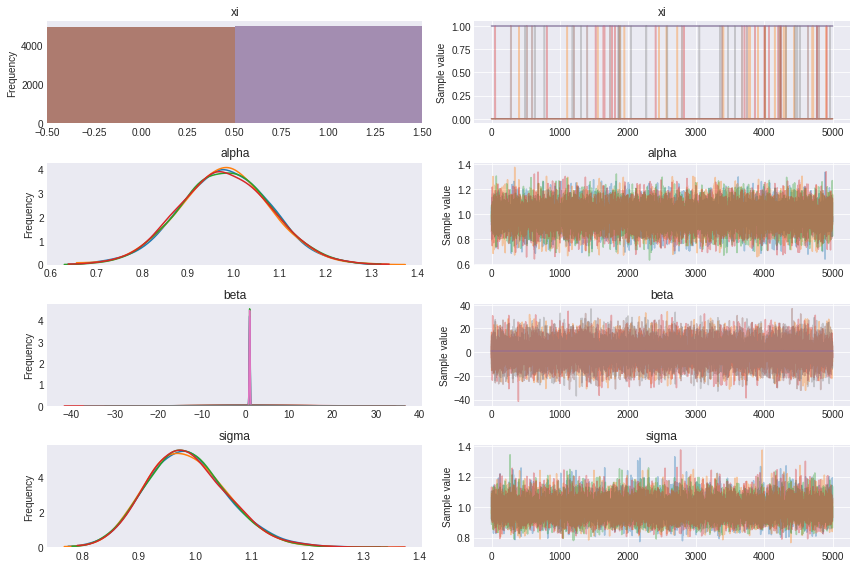

In [279]:
pm.traceplot(trace);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0afa2e2278>,
      dtype=object)

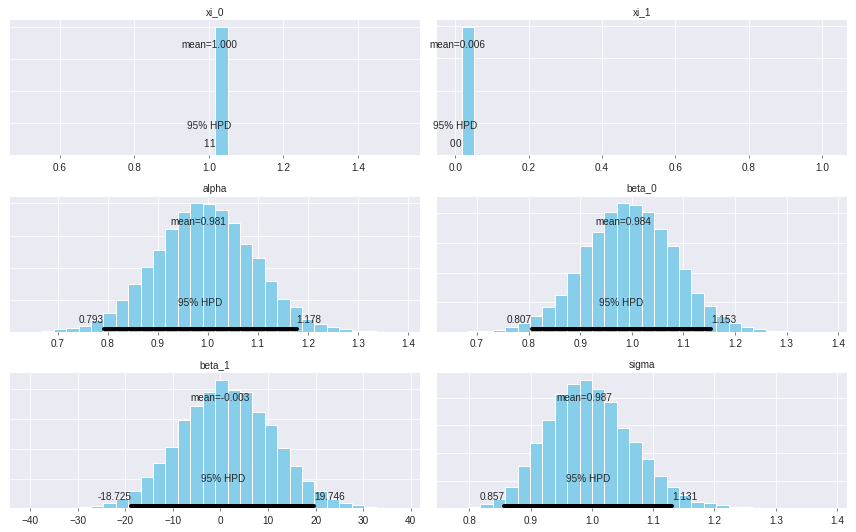

In [280]:
pm.plot_posterior(trace)

(array([  36.,  266., 1332., 4123., 6329., 5200., 2141.,  497.,   69.,
           7.]),
 array([0.64612037, 0.71833481, 0.79054925, 0.8627637 , 0.93497814,
        1.00719258, 1.07940702, 1.15162146, 1.2238359 , 1.29605034,
        1.36826478]),
 <a list of 10 Patch objects>)

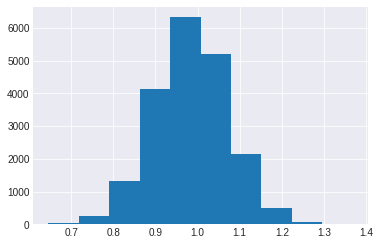

In [281]:
plt.hist(trace['xi'][:, 0] * trace['beta'][:, 0])

(array([3.0000e+00, 1.1000e+01, 8.0000e+00, 2.5000e+01, 2.4000e+01,
        1.9907e+04, 7.0000e+00, 4.0000e+00, 7.0000e+00, 4.0000e+00]),
 array([-0.15939396, -0.1293537 , -0.09931344, -0.06927319, -0.03923293,
        -0.00919267,  0.02084759,  0.05088784,  0.0809281 ,  0.11096836,
         0.14100862]),
 <a list of 10 Patch objects>)

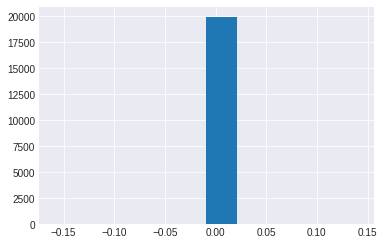

In [282]:
plt.hist(trace['xi'][:, 1] * trace['beta'][:, 1])

100%|██████████| 500/500 [00:00<00:00, 1603.03it/s]


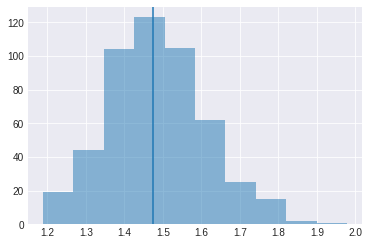

In [283]:
ppc = pm.sample_posterior_predictive(trace, samples=500, model=basic_model)
plt.hist([Y_obs.std() for Y_obs in ppc['Y_obs']], alpha=0.5)
plt.axvline(Y.std())